In [93]:
# --------------------------------------------
# Blame : Anirban Chakraborty (GF) / Raghul Ranganathan J
# Assignment : Lending Club
# Description : EDA for lending club problem
#Language : Python3
# Draft #: 1
# Start Date : 11th Jan 2021
# End Date : 17th Jan 2021
# ----------------------------------------------

## Lending Club case study : 


Consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

   1. If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company

   2. If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Lending Club case study aims to identify the **risky loan applicants in order to cut down the amount of credit loss**.

The company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment. 

#### Approach :
    - Exploratory data analysis (EDA) is used to understand and highlight a pattern to find the whether any individual is likely to default or not.
    - By achieving this objective the company can use this knowledge for its portfolio and risk assessment.



## Steps to proceed with the Case Study

1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Recommendations

In [94]:
# Importing libraies 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# disable chained assignments
pd.options.mode.chained_assignment = None 
    

## Reading Loan.csv file and create a Data Frame

In [95]:
# Reading data from 'loan.csv' file 

df_loan = pd.read_csv("loan.csv", engine="python")


## Get some basic idea regarding the data frame 

1. describe() - to get an statistical insights about the numerical columns

2. data types of variables - to distinguish as categorical and numerical columns

3. Percentage of Missing values - to remove the columns

4. Get head() of the data frame - to have an insight on data

In [96]:
# describe () the data frame 

df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [97]:
# Know the data types in the data frame 
df_loan.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [98]:
# Get the head of the data frame 

df_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,collections_12_mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

There are few basic ideas behind data cleaning

   1. Checked the percentage of missing values.
    
   2. Removed all those with very high missing percentage.

   3. For columns with less missing percentage we have performed data cleaning steps for both columns and rows
   
        a. We have imputed the data in columns where it is required 
      
        b. We have also dropped rows where the missing percentage is quite high.

In [99]:
# Know the pencentage of missing data 

column_null = round(100 * (df_loan.isnull().mean()), 3)


# Missing value againt all column listed 
column_null  


id                              0.000
member_id                       0.000
loan_amnt                       0.000
funded_amnt                     0.000
funded_amnt_inv                 0.000
                               ...   
tax_liens                       0.098
tot_hi_cred_lim               100.000
total_bal_ex_mort             100.000
total_bc_limit                100.000
total_il_high_credit_limit    100.000
Length: 111, dtype: float64

In [100]:
# Droping column with more than 90 % of missing values 

# Accesing group of columns which has >= 90% of missing values 

missingval_columns = list(column_null[column_null > 90].index)

# Drop columns with more than 90 % of missing values

df_loan = df_loan.drop(missingval_columns, axis=1)



In [101]:
# Know the shape of the date frame after droping columns with missing values 

df_loan.shape


(39717, 55)

## Distinguish the numerical and categorical columns 

In [102]:
# Numerical columns

col_numerical = df_loan.columns[df_loan.dtypes != "object"]


# Categorical columns

col_categorical = df_loan.columns[df_loan.dtypes == "object"]



## Imputing missing values for numerical data columns 

In [103]:
# Write a function to impute NAN values with mean/median/mode 
def impute_val(df_name, col_name, val):

    df_name[col_name] = df_name[col_name].fillna(val)


In [104]:
# Collecting information regarding missing value count

df_loan[col_numerical].isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med       56
policy_code                       0
acc_now_delinq              

In [105]:
# looking at the column data 'collections_12_mths_ex_med'

df_loan['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [106]:
# Clearly the column 'collections_12_mths_ex_med' contains either 0 or NAN data , this column will not help us in analysis so we can drop this column.

df_loan = df_loan.drop('collections_12_mths_ex_med',axis=1)

In [107]:
# Looking for column 'chargeoff_within_12_mths'
df_loan['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [108]:
# Column chargeoff_within_12_mths also contains either 0 or NAN values , this column is not important to us and so we can drop this column.

df_loan = df_loan.drop('chargeoff_within_12_mths',axis=1)

In [109]:
# Looking for column 'pub_rec_bankruptcies'

df_loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

The above column contains categorical values represented in numeric form , We can impute the missing values with mode 
 

In [110]:

mode_pub_rec_bankruptcies=round(df_loan.pub_rec_bankruptcies.mode()[0])

# calling function impute_val() to impute NAN values defined in cell 9

impute_val(df_loan,'pub_rec_bankruptcies',mode_pub_rec_bankruptcies)

In [111]:
# looking at the column data 'tax_liens'

df_loan['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [112]:
# The above column contains only value 0 and NAN , going forward we will not require this column for our analysis , so droping this column 

df_loan = df_loan.drop('tax_liens',axis=1)


Now we will again see the shape and details of our data frame after droping and imputing Null values 

In [113]:
col_numerical=df_loan.columns[df_loan.dtypes!='object']
df_loan[col_numerical].isnull().sum()

# Now once the above activity is done let us check the shape of the data frame 
df_loan.shape


(39717, 52)

## Imputing/handling missing values for Categorical data columns 

In [114]:
# Let us now concentrate on the categorical data columns 
# Find the missing values in the categorical columns 

df_loan[col_categorical].isnull().sum()


term                       0
int_rate                   0
grade                      0
collections_12_mths        0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
earliest_cr_line           0
revol_util                50
initial_list_status        0
last_pymnt_d              71
last_credit_pull_d         2
application_type           0
dtype: int64

There are 6 columns which has missing values , they are 
1. emp_title
2. emp_length
3. title
4. last_pymnt_d
5. revol_util
6. last_credit_pull_d

Let us analyze each of columns one by one and see how the missing values can be handled.

In [115]:
# Lets find out the % of missing values in these 6 columns 

missing_value = round(100 * (df_loan.isnull().mean()), 3)

missing_value


id                          0.000
member_id                   0.000
loan_amnt                   0.000
funded_amnt                 0.000
funded_amnt_inv             0.000
term                        0.000
int_rate                    0.000
installment                 0.000
grade                       0.000
collections_12_mths         0.000
emp_title                   6.191
emp_length                  2.707
home_ownership              0.000
annual_inc                  0.000
verification_status         0.000
issue_d                     0.000
loan_status                 0.000
pymnt_plan                  0.000
url                         0.000
desc                       32.581
purpose                     0.000
title                       0.028
zip_code                    0.000
addr_state                  0.000
dti                         0.000
delinq_2yrs                 0.000
earliest_cr_line            0.000
inq_last_6mths              0.000
mths_since_last_delinq     64.662
open_acc      

- Finding Distinct values in column 
- This will help us to futher bring down the variables and will help us to analyze better 


In [116]:
# Find the number of unique observations across various columns . The point here is if we find columns with same values and if that does 
# not add any value to our analysis then we will drop it 

distinct_val=df_loan.nunique()

distinct_val.sort_values()



acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
collections_12_mths           35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util

# Few Assumptions made before data Analysis



## Identifying  predictors of default


   - The objective is to identify predictors of default so that at the time of loan application, we can use those
     variables for approval/rejection of the loan. 
     
   - There are broadly three types of variables -
 
       1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.),
       2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and
       3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years,
          revolving balance, next payment date etc.)
          
   -  The customer behaviour variables are not available at the time of loan application, and thus they
      cannot be used as predictors for credit approval.
      
   -  The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans. Also, tag the
      other two values as 0 or 1 to make your analysis simple and clean.

# Selecting final columns : 

 

## Selecting columns related to applicant and the columns which has loan characteristics
### Dropping all customer behaviour variables other than below 


1. **funded_amnt** : The total amount committed to that loan at that point in time.

2. **int_rate** : Interest Rate on the loan

3. **annual_inc** :The self-reported annual income provided by the borrower during registration.

4. **delinq_2yrs** : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

5. **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage          and the requested LC loan, divided by the borrower’s self-reported 

6. **emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means                 ten or more years.

7. **loan_status**: Current status of the loan

8. **open_acc** : The number of open credit lines in the borrower's credit file.

9. **pub_rec** : Number of derogatory public records

10. **pub_rec_bankruptcies** : Number of public record bankruptcies

11. **total_acc** : The total number of credit lines currently in the borrower's credit file

12. **grade** : LC assigned loan grade

13. **purpose** : A category provided by the borrower for the loan request. 

14. **home_ownership** : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN,                              MORTGAGE, OTHER.

15. **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.

In [117]:
# create a final data frame above mentioned variable / columns

selected_col = [
    "funded_amnt",
    "int_rate",
    "annual_inc",
    "delinq_2yrs",
    "dti",
    "emp_length",
    "open_acc",
    "pub_rec",
    "pub_rec_bankruptcies",
    "total_acc",
    "grade",
    "purpose",
    "home_ownership",
    "loan_status",
    "term",
    "verification_status",
    "addr_state",
]

df_loan_final = df_loan[selected_col]

df_loan_final


,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65%,24000.0,0,27.65,10+ years,3,0,0.0,9,B,credit_card,RENT,Fully Paid,36 months,Verified,AZ
1,2500,15.27%,30000.0,0,1.00,< 1 year,3,0,0.0,4,C,car,RENT,Charged Off,60 months,Source Verified,GA
2,2400,15.96%,12252.0,0,8.72,10+ years,2,0,0.0,10,C,small_business,RENT,Fully Paid,36 months,Not Verified,IL
3,10000,13.49%,49200.0,0,20.00,10+ years,10,0,0.0,37,C,other,RENT,Fully Paid,36 months,Source Verified,CA
4,3000,12.69%,80000.0,0,17.94,1 year,15,0,0.0,38,B,other,RENT,Current,60 months,Source Verified,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,8.07%,110000.0,0,11.33,4 years,13,0,0.0,40,A,home_improvement,MORTGAGE,Fully Paid,36 months,Not Verified,CO
39713,8500,10.28%,18000.0,1,6.40,3 years,6,0,0.0,9,C,credit_card,RENT,Fully Paid,36 months,Not Verified,NC
39714,5000,8.07%,100000.0,0,2.30,< 1 year,11,0,0.0,20,A,debt_consolidation,MORTGAGE,Fully Paid,36 months,Not Verified,MA
39715,5000,7.43%,200000.0,0,3.72,< 1 year,17,0,0.0,26,A,other,MORTGAGE,Fully Paid,36 months,Not Verified,MD


In [118]:
col_null = round(100 * (df_loan_final.isnull().mean()), 3)

col_null

funded_amnt             0.000
int_rate                0.000
annual_inc              0.000
delinq_2yrs             0.000
dti                     0.000
emp_length              2.707
open_acc                0.000
pub_rec                 0.000
pub_rec_bankruptcies    0.000
total_acc               0.000
grade                   0.000
purpose                 0.000
home_ownership          0.000
loan_status             0.000
term                    0.000
verification_status     0.000
addr_state              0.000
dtype: float64

Cleaning up the final columns before analysis 

In [119]:
# 1. removing % sign from column int_rate and also type converting the column data 

df_loan_final['int_rate']=df_loan_final['int_rate'].str.rstrip("%")
df_loan_final

,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65,24000.0,0,27.65,10+ years,3,0,0.0,9,B,credit_card,RENT,Fully Paid,36 months,Verified,AZ
1,2500,15.27,30000.0,0,1.00,< 1 year,3,0,0.0,4,C,car,RENT,Charged Off,60 months,Source Verified,GA
2,2400,15.96,12252.0,0,8.72,10+ years,2,0,0.0,10,C,small_business,RENT,Fully Paid,36 months,Not Verified,IL
3,10000,13.49,49200.0,0,20.00,10+ years,10,0,0.0,37,C,other,RENT,Fully Paid,36 months,Source Verified,CA
4,3000,12.69,80000.0,0,17.94,1 year,15,0,0.0,38,B,other,RENT,Current,60 months,Source Verified,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,8.07,110000.0,0,11.33,4 years,13,0,0.0,40,A,home_improvement,MORTGAGE,Fully Paid,36 months,Not Verified,CO
39713,8500,10.28,18000.0,1,6.40,3 years,6,0,0.0,9,C,credit_card,RENT,Fully Paid,36 months,Not Verified,NC
39714,5000,8.07,100000.0,0,2.30,< 1 year,11,0,0.0,20,A,debt_consolidation,MORTGAGE,Fully Paid,36 months,Not Verified,MA
39715,5000,7.43,200000.0,0,3.72,< 1 year,17,0,0.0,26,A,other,MORTGAGE,Fully Paid,36 months,Not Verified,MD


In [120]:
# Now know the data type of column int_rate 

df_loan_final['int_rate'].dtype


dtype('O')

In [121]:
# As the dtype is object we will convert it into float 

df_loan_final['int_rate'] = pd.to_numeric(df_loan_final['int_rate'], downcast="float")
df_loan_final['int_rate'].dtype

dtype('float32')

In [122]:
df_loan_final.head()

,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65,24000.0,0,27.65,10+ years,3,0,0.0,9,B,credit_card,RENT,Fully Paid,36 months,Verified,AZ
1,2500,15.27,30000.0,0,1.00,< 1 year,3,0,0.0,4,C,car,RENT,Charged Off,60 months,Source Verified,GA
2,2400,15.96,12252.0,0,8.72,10+ years,2,0,0.0,10,C,small_business,RENT,Fully Paid,36 months,Not Verified,IL
3,10000,13.49,49200.0,0,20.00,10+ years,10,0,0.0,37,C,other,RENT,Fully Paid,36 months,Source Verified,CA
4,3000,12.69,80000.0,0,17.94,1 year,15,0,0.0,38,B,other,RENT,Current,60 months,Source Verified,OR


In Column 'emp_length' we can observe values which are not numerical , so we need to convert these categorical values to numerical 

We are assuming values which are given as < 1 year to be 0.50 years and values which are 10+ years 10.50 years



In [123]:
df_loan_final['emp_length']=df_loan_final['emp_length'].str.rstrip('years')

df_loan_final['emp_length'] = df_loan_final['emp_length'].str.replace('<\ 1','0.50')
df_loan_final['emp_length'] = df_loan_final['emp_length'].str.replace('10\+','10.50')
df_loan_final['emp_length'] = df_loan_final['emp_length'].astype(float) 

df_loan_final


,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65,24000.0,0,27.65,10.5,3,0,0.0,9,B,credit_card,RENT,Fully Paid,36 months,Verified,AZ
1,2500,15.27,30000.0,0,1.00,0.5,3,0,0.0,4,C,car,RENT,Charged Off,60 months,Source Verified,GA
2,2400,15.96,12252.0,0,8.72,10.5,2,0,0.0,10,C,small_business,RENT,Fully Paid,36 months,Not Verified,IL
3,10000,13.49,49200.0,0,20.00,10.5,10,0,0.0,37,C,other,RENT,Fully Paid,36 months,Source Verified,CA
4,3000,12.69,80000.0,0,17.94,1.0,15,0,0.0,38,B,other,RENT,Current,60 months,Source Verified,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,8.07,110000.0,0,11.33,4.0,13,0,0.0,40,A,home_improvement,MORTGAGE,Fully Paid,36 months,Not Verified,CO
39713,8500,10.28,18000.0,1,6.40,3.0,6,0,0.0,9,C,credit_card,RENT,Fully Paid,36 months,Not Verified,NC
39714,5000,8.07,100000.0,0,2.30,0.5,11,0,0.0,20,A,debt_consolidation,MORTGAGE,Fully Paid,36 months,Not Verified,MA
39715,5000,7.43,200000.0,0,3.72,0.5,17,0,0.0,26,A,other,MORTGAGE,Fully Paid,36 months,Not Verified,MD


 # Modifying Columns (changing data types for column data)

In [124]:
#Verify the data type for funded_amnt

df_loan_final['funded_amnt'] .dtype 

dtype('int64')

In [125]:
# funded_amnt is int type so converting it into float 

df_loan_final.loc[:, 'funded_amnt'].astype(float)

0         5000.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 39717, dtype: float64

In [126]:
# Verify data type of annual_inc 

df_loan_final['funded_amnt'] .dtype


dtype('int64')

As data type for funded_amnt is float , so we need not to change anything .

In [127]:

# Verify datatype for delinq_2yrs 

df_loan_final['delinq_2yrs'] .dtype

dtype('int64')

As this column represents count of incidences , we need not to change anything here 

In [128]:
# Verify data type for dti 

df_loan_final['dti'] .dtype

dtype('float64')

It is a ratio , so we need not to change data type here 

In [129]:
# verify the data type for open_acc 

df_loan_final['open_acc'] .dtype 

dtype('int64')

This is the number of open credit lines for borower , so int type

In [130]:
# verify data type for pub_rec 

df_loan_final['pub_rec'] .dtype

dtype('int64')

 As this column represents the number degratory records for the customer so it is ok to have int data type 

In [131]:
# Verify data type for  pub_rec_bankruptcies 

df_loan_final['pub_rec_bankruptcies'] .dtype

dtype('float64')

In [132]:
# As this is a number that represents number of bankruptcies so it better to change it as float

df_loan_final.loc[:, 'pub_rec_bankruptcies'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: pub_rec_bankruptcies, Length: 39717, dtype: int64

# Changing column loan_status data 

Drop all 'current' rows from loan_status

In [133]:
df_loan_final = df_loan_final[df_loan_final.loan_status != "Current"]
df_loan_final = df_loan_final.loc[:, df_loan_final.nunique() != 1]

df_loan_final["loan_status"].value_counts()
df_loan_final.head()


,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65,24000.0,0,27.65,10.5,3,0,0.0,9,B,credit_card,RENT,Fully Paid,36 months,Verified,AZ
1,2500,15.27,30000.0,0,1.00,0.5,3,0,0.0,4,C,car,RENT,Charged Off,60 months,Source Verified,GA
2,2400,15.96,12252.0,0,8.72,10.5,2,0,0.0,10,C,small_business,RENT,Fully Paid,36 months,Not Verified,IL
3,10000,13.49,49200.0,0,20.00,10.5,10,0,0.0,37,C,other,RENT,Fully Paid,36 months,Source Verified,CA
5,5000,7.90,36000.0,0,11.20,3.0,9,0,0.0,12,A,wedding,RENT,Fully Paid,36 months,Source Verified,AZ


In [134]:
# tag all Fully paid entries to 0 and Charged Off to 1 and add a new column 

df_loan_final['loan_status']= df_loan_final['loan_status'].apply(lambda x: 0 if x== 'Fully Paid' else 1)

df_loan_final['loan_status']=df_loan_final['loan_status'].apply(lambda x: pd.to_numeric(x))

#df_loan_final['loan_satus']=df_loan_final['loan_satus'].astype(int)

df_loan_final['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [135]:
df_loan_final.head()

,funded_amnt,int_rate,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,grade,purpose,home_ownership,loan_status,term,verification_status,addr_state
0,5000,10.65,24000.0,0,27.65,10.5,3,0,0.0,9,B,credit_card,RENT,0,36 months,Verified,AZ
1,2500,15.27,30000.0,0,1.00,0.5,3,0,0.0,4,C,car,RENT,1,60 months,Source Verified,GA
2,2400,15.96,12252.0,0,8.72,10.5,2,0,0.0,10,C,small_business,RENT,0,36 months,Not Verified,IL
3,10000,13.49,49200.0,0,20.00,10.5,10,0,0.0,37,C,other,RENT,0,36 months,Source Verified,CA
5,5000,7.90,36000.0,0,11.20,3.0,9,0,0.0,12,A,wedding,RENT,0,36 months,Source Verified,AZ


In [136]:
# info regarding loan status 

df_loan_final['loan_status'].describe()

count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [137]:
# We can bin the funded amount in 3 categories high/medium/low


def fund_groups(n):
    if n < 5000:
        return "low"
    elif n >= 5000 and n < 15000:
        return "medium"
    elif n >= 15000 and n < 25000:
        return "high"
    else:
        return "very high"


# The funded amount is divided in various categories low/medium/high

df_loan_final["funded_amnt"] = df_loan_final["funded_amnt"].apply(
    lambda x: fund_groups(x)
)


In [138]:
# bin interest rates


def interest_bin(n):
    if n < 10:
        return "low"
    elif n >= 10 and n < 15:
        return "medium"
    elif n >= 15 and n < 20:
        return "high"
    else:
        return "very high"


df_loan_final["int_rate"] = df_loan_final["int_rate"].apply(lambda x: interest_bin(x))


# Data Analysis

## Univariate Analysis

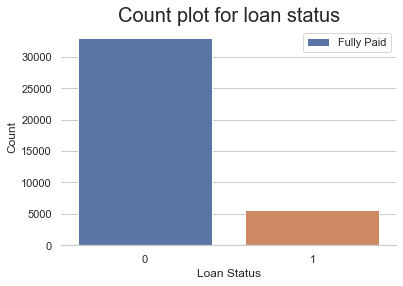

Inference :

0    32950
1     5627
Name: loan_status, dtype: int64

About 16 % of borrowers did not pay the loan amount , which is high number


In [139]:
# Count plot for loan status

loan_status = sns.countplot(x=df_loan_final["loan_status"])
loan_status.set(xlabel="Loan Status", ylabel="Count")
loan_status.set_title("Count plot for loan status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.legend(loc="upper right", labels=["Fully Paid", "Charged Off"])
plt.show()
loan_status.get_figure().savefig("loan_status.png")
print("Inference :\n\n{0}".format(df_loan_final["loan_status"].value_counts()))

print("\nAbout 16 % of borrowers did not pay the loan amount , which is high number")


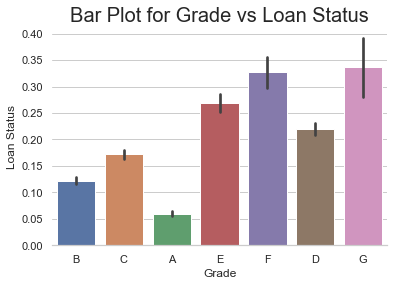

In [140]:
# Bar plot for grade vs loan_status

# visualizing the default rates
grade_loanStatus = sns.barplot(
    x="grade", y="loan_status", data=df_loan_final
)  
grade_loanStatus.set(xlabel="Grade", ylabel="Loan Status")
grade_loanStatus.set_title("Bar Plot for Grade vs Loan Status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.show()
grade_loanStatus.get_figure().savefig("grade_loanStatus.png")


Inference : From the above graph we can infer that loans of grade 'G' 'F' has very high rate of defaulters 

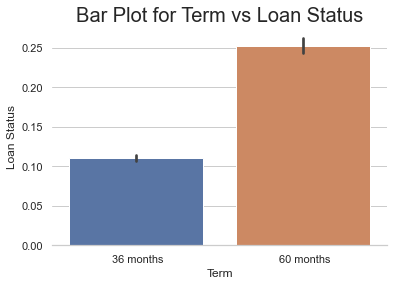

In [141]:
# Bar plot for term vs loan_satus
# visualizing the default rates
term_loanStatus = sns.barplot(
    x="term", y="loan_status", data=df_loan_final
) 
term_loanStatus.set(xlabel="Term", ylabel="Loan Status")
term_loanStatus.set_title("Bar Plot for Term vs Loan Status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.show()
term_loanStatus.get_figure().savefig("term_loanStatus.png")


Inference : Loan with higher terms i.e. 60 months has higher chances to default than loans with a lower term 

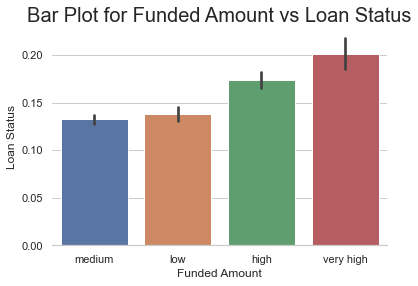

In [142]:
# Bar plot for funded_amnt vs loan_satus

# visualizing the default rates
fund_loanStatus = sns.barplot(x="funded_amnt", y="loan_status", data=df_loan_final)
fund_loanStatus.set(xlabel="Funded Amount", ylabel="Loan Status")
fund_loanStatus.set_title("Bar Plot for Funded Amount vs Loan Status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.show()
fund_loanStatus.get_figure().savefig("fund_loanStatus.png")


Inference : Higher funded amount has higher chances of getting defaulted , funded amount above 25000 has the highest chance of getting defaulted .

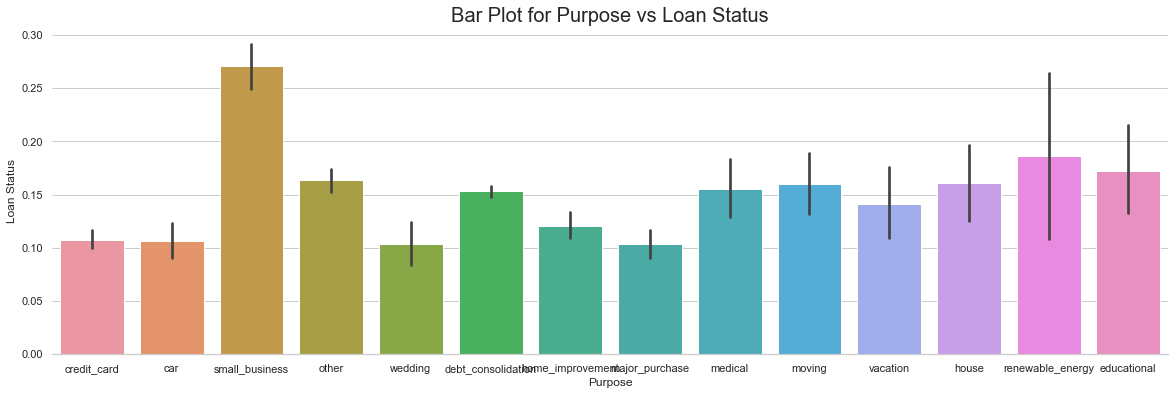

In [143]:
# Bar plot purpose vs loan_satus
plt.figure(figsize=(20, 6))

# visualizing the default rates
purpose_loanStatus = sns.barplot(x="purpose", y="loan_status", data=df_loan_final)
purpose_loanStatus.set(xlabel="Purpose", ylabel="Loan Status")
purpose_loanStatus.set_title("Bar Plot for Purpose vs Loan Status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.show()
purpose_loanStatus.get_figure().savefig("purpose_loanStatus.png")


Inference : Loan taken with purpose = small business invoves high risk and most likely to default 

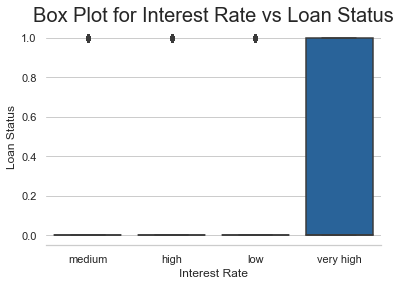

In [144]:
# Analysing int_rate vs loan_satus through box plot

intr_rate_loanStatus = sns.boxplot(
    x=df_loan_final["int_rate"], y=df_loan_final["loan_status"], palette="Blues"
)
intr_rate_loanStatus.set(xlabel="Interest Rate", ylabel="Loan Status")
intr_rate_loanStatus.set_title("Box Plot for Interest Rate vs Loan Status", fontsize=20)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.show()
intr_rate_loanStatus.get_figure().savefig("intr_rate_loanStatus.png")


Inference : Very high interest rates has very high chances of default , here interest rates more than 20 has maximum chances of default. 

 # Bivariate Analysis

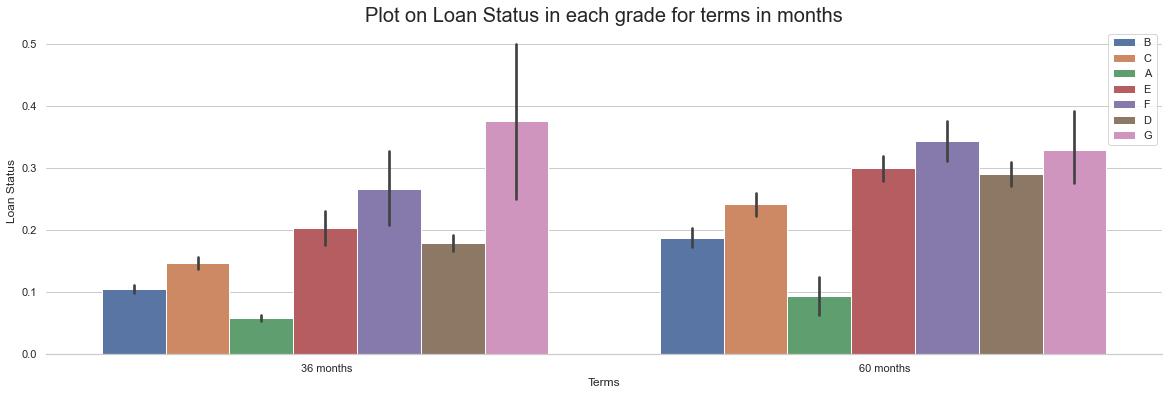

In [145]:
# Analysing loan_status with term and grade

plt.figure(figsize=(20, 6))

term_grade_status = sns.barplot(
    x="term", y="loan_status", hue="grade", data=df_loan_final
)

term_grade_status.set(xlabel="Terms", ylabel="Loan Status")
term_grade_status.set_title(
    "Plot on Loan Status in each grade for terms in months", fontsize=20
)
sns.despine()
sns.set(style="whitegrid")
sns.despine(left=True)
plt.legend()
plt.show()
term_grade_status.get_figure().savefig("bi_term_grade_status.png")


Inference : 

             1. Grade G loans for interval 36 months are mostly likely to default 
             2. Grade G loans for interval 60 months are mostly likely to default
             3. Grade A loans are safest irrespective of their terms 

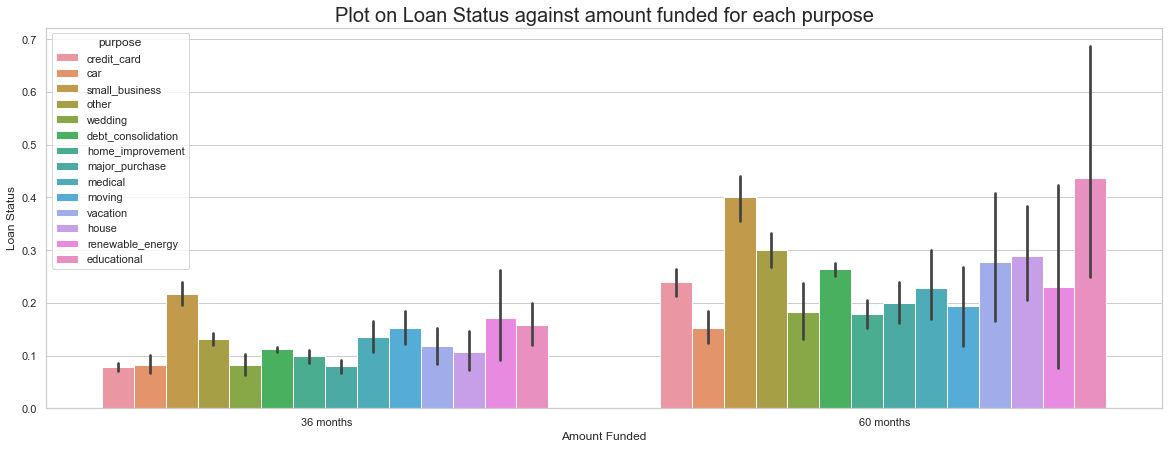

In [146]:
# Analysing loan_status with term and purpose

plt.figure(figsize=(20, 7))

term_pupose_status = sns.barplot(
    x="term", y="loan_status", hue="purpose", data=df_loan_final
)
term_pupose_status.set(xlabel="Amount Funded", ylabel="Loan Status")
term_pupose_status.set_title(
    "Plot on Loan Status against amount funded for each purpose", fontsize=20
)
plt.show()
term_pupose_status.get_figure().savefig("bi_term_pupose_status.png")


Inference : Loans small business / credit card debts has higher risk for default 

## Correlation Matrix 

In [147]:
corr = df_loan_final.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,annual_inc,delinq_2yrs,dti,emp_length,open_acc,pub_rec,pub_rec_bankruptcies,total_acc,loan_status
annual_inc,1.00,0.02,-0.12,0.11,0.16,-0.02,-0.02,0.23,-0.04
delinq_2yrs,0.02,1.00,-0.03,0.02,0.01,0.01,0.00,0.07,0.02
dti,-0.12,-0.03,1.00,0.05,0.29,-0.00,0.01,0.23,0.05
emp_length,0.11,0.02,0.05,1.00,0.10,0.06,0.06,0.21,0.02
open_acc,0.16,0.01,0.29,0.10,1.00,0.00,0.01,0.69,-0.01
pub_rec,-0.02,0.01,-0.00,0.06,0.00,1.00,0.84,-0.02,0.05
pub_rec_bankruptcies,-0.02,0.00,0.01,0.06,0.01,0.84,1.00,-0.01,0.05
total_acc,0.23,0.07,0.23,0.21,0.69,-0.02,-0.01,1.00,-0.02
loan_status,-0.04,0.02,0.05,0.02,-0.01,0.05,0.05,-0.02,1.00


# Recommendations

1. Around 16 % of borrower has defaulted and this can be considered as a high number also investors needs to take measures to collect back the amount lended.

2. Graded loans (G, F) has high percentage of defaulters , investors should not give a high grade loan without looking      at details of borrowers.

3. A high loan term has higher chances of default , so Investors should lend money for lower terms

4. Investors should refrain from lending high amount , it has been observed that a loan amount higher than 25000 has maximum chance of getting defaulted and also loan amount lesser than 25000 has the low chance of getting default which is favourable

5. Loan given for small business or educational debts involves high risk and most likely to default , Investors should judiciously invest with small business ventures .
   
6. A high interest rate often leads to higher chances of default.

7. DTI is another factor that should be taken care of , if the DTI value is high then the borrower has very high obligation to    pay other debts or has more expenditure than income , investors should look into the DTI score carefully before lending money. investors should lend money to applicants having very low DTI score.